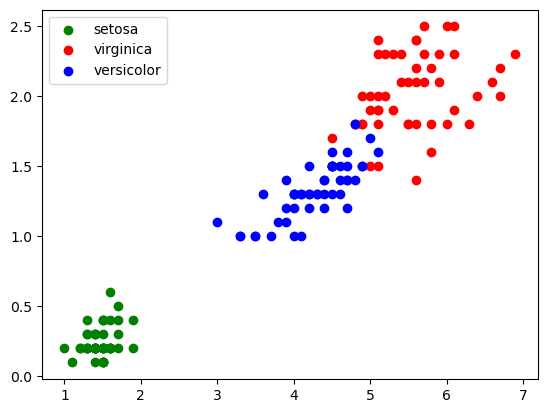

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Importation des données
iris = pd.read_csv("iris.csv")
x = iris.loc[:,"petal_length"]
y = iris.loc[:,"petal_width"]
lab = iris.loc[:,"species"]
# Affichage des données
for e, c in [('setosa','g'), ('virginica', 'r'), ('versicolor', 'b')]:
    plt.scatter(x[lab == e], y[lab == e], color = c, label = e)
plt.legend()
fig = plt.gcf()
plt.show()

<h1>KPPV</h1>

In [2]:
import numpy as np
x=np.array((4,2,2))
y=np.array((3,1,6))
#distance euclidienne*
def dist_euclid(p1,p2):
    return np.sqrt(np.sum(np.square(p2-p1)))
dist_euclid(x,y)

4.242640687119285

In [3]:
def dist_manhattan(p1,p2):
    return np.sum(np.abs(p2-p1))
dist_manhattan(x,y)

6

In [4]:
def dist_hamming(p1,p2):
    return np.sum(p1^p2)
dist_hamming(x,y)

14

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
import numpy as np
from collections import Counter 
import random
"""
Cette fonction est l'algorithme kppv (k plus proche voisins) pour la dataframe Iris
:param data la base de donnée
:param xt : la donnée test
:param k : le nombre de voisins les plus proches
:param d : la fonction de calcule de distance (j'en ai fait 3 Euclidienne,Manhattan,Hamming)
"""
def kppv(data,xt,k,d): 
    assert k < data.shape[0] #je vérifie que k < n  n étant la taille du jeu de donnée
    resultat=[] #tableau des distances ainsi que l'espèce correspondant à la donnée comparer
    frequence=[] #tableau de fréquence des espèces de fleurs
    print(xt)
    for index, row in data.iterrows(): 
        resultat.append((d(np.array((row["sepal_length"], row["petal_length"])),(xt["sepal_length"],xt["petal_length"])),row["species"]))
        #le résultat est sous la forme d'un tuple (distance,espèce)
    resultat.sort() #je trie par ordre croissant
    resultat=resultat[:k] #je prend que les k premiers qui seront les k plus proches voisins
    frequence=[x[1] for x in resultat] #je prend que les espèces de fleurs
    xt["species"]=Counter(frequence).most_common(1)[0][0] #je prend l'espèce de fleur qui a le plus de voisins dans la liste et je change l'espèce de
    #la donnée test
    return xt #je sais pas trop quoi renvoyer du coup je renvoie la donnée test

test_iris=iris.sample(20)
kppv(test_iris,test_iris.iloc[10],7,dist_euclid)

        
    

sepal_length           6.8
sepal_width            2.8
petal_length           4.8
petal_width            1.4
species         versicolor
Name: 76, dtype: object


C:\Users\A052080\AppData\Local\Temp\ipykernel_7840\3908002191.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xt["species"]=Counter(frequence).most_common(1)[0][0] #je prend l'espèce de fleur qui a le plus de voisins dans la liste et je change l'espèce de


sepal_length           6.8
sepal_width            2.8
petal_length           4.8
petal_width            1.4
species         versicolor
Name: 76, dtype: object

<h1> ZEROR </h1>

In [7]:
import numpy as np
from collections import Counter 
"""
Cette fonction correspond à l'algorithme de classification zeroR pour le jeu de donnée Iris en fonction de la fréquence des espèces
:param data le jeu de donnée
"""
def zeroR(data):
    frequence=data["species"]
    return Counter(frequence).most_common(1)[0][0]

zeroR(iris)

'setosa'

<h1>ONER</h1>

In [9]:
import numpy as np
from collections import Counter 
from fractions import Fraction
"""
Cette fonction représente l'algorithm ONER pour tous les jeux de donnée en fonction d'une colonne
:param data le jeu de donnée iris
"""
def oneR(data,classe):
    regles=[] #les règles que je vais stocker
    tauxErreur=1 #et le taux d'erreur
    dataWOS=data.drop(classe,axis=1)
    #dataWOS = dataWithOutSpecies le jeu de donnée sans la colonne espèce
    for (columnName, columnData) in dataWOS.items(): #pour chaque colonne je fais la fonction frequence qui retourne un tuple (regles,tauxErreur)
        tmp=frequence(data,columnData,columnName,data[classe])
        if tmp[1]<tauxErreur: 
            regles=tmp[0]
            tauxErreur=tmp[1]
    return (regles,tauxErreur)

def frequence(data,featureData,featureName,classData):
    tab=[]
    groups={}
    freq=[]
    regles=[]
    ind=0
    for value in featureData: #je parcours chaque valeur de la feature 
        tab.append((value,classData.loc[ind])) #je stock dans mon tableau tab un tuple (valeur,espèce de fleur)
        ind+=1
        
    for xx, yy in tab: #je regroupe dans un dictionnaire en mettant (valeur : [espèce]) key=valeur value=[espèce]
        tmp = groups.get(xx, [])
        tmp.append(yy)
        groups[xx] = tmp
        
    for key,value in groups.items():#pour chaque élément de mon dictionnaire
        class_most_freq=Counter(value).most_common()[0] #je prend l'espèce la plus commune pour chaque valeur
        class_freq=Counter(value) 
        if len(class_freq)!=1 :
            freq.append(list(class_freq.values())[-1]) #je l'ajoute dans un tableau de frequence pour faire le calcul de taux d'erreur
        regle=f"SI {featureName} = {key} ALORS {class_most_freq[0]}" #je créé ma règle
        regles.append(regle) #je l'ajoute dans mon tableau de règles
    tauxErreur=Fraction(sum(freq),len(featureData))
    return (regles,tauxErreur) #je renvoie un tuple (regles,taux d'erreur)

   

In [10]:
golf=pd.read_csv("golf.csv")
golf

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [11]:
oneR(golf,'Play Golf')

(['SI Outlook = Rainy ALORS No',
  'SI Outlook = Overcast ALORS Yes',
  'SI Outlook = Sunny ALORS Yes'],
 Fraction(2, 7))

In [12]:
import numpy as np
import pandas as pd
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h1>NAIVE BAYES</h1>

In [14]:
"""
fonction qui calcule la probabilité à priori
"""
def proba_priori(data,classe,variable):
    return data.groupby(classe).size()[variable]/len(data[classe])
proba_priori(titanic,"pclass",3)

0.5510662177328844

In [123]:
import numpy as np
def moyenne(nombres):
    return sum(nombres)/len(nombres)
def variance(nombres):
    moy=moyenne(nombres)
    variance=sum([(x-moy)**2 for x in nombres]) / float(len(nombres)-1)
    return variance
print(variance(titanic.pclass))
print(moyenne(titanic.pclass))

0.6990151199889065
2.308641975308642


In [122]:
"""
fonction qui calcule le Gaussian
"""
def gaussian(data,classe,x):
    moy=moyenne(data[classe])
    var = variance(data[classe])
    num = np.exp(-((x - moy) ** 2) / (2 * var**2))
    den = np.sqrt(2 * np.pi )* var
    return num / den
result=[]
for x in titanic.pclass.unique() :
    print(gaussian(titanic,'pclass',x))

0.3499512206526093
0.09893649836374452
0.5177132923138529


In [118]:
"""
fonction qui renvoie la clé d'après une valeur
"""

def get_key(dic,x):
    for i in dic:
        for j in dic[i]:
            if j == x :
                return i
    return None
"""
fonction qui fait la classification naïve de Bayes
:param data mon corpus/dataset
:param classe le nom de la feature 
"""
def naiveBayes(data,classe):
    posterioris=[] #je stock tous les probabilités à posteriori
    dictio={} #ce dictionnaire me permettre de ranger les proba à posteriori par feature
    dataWOS=data.drop(classe,axis=1)
    for columnName,columnData in dataWOS.items(): #je parcours par feature
        tmp=[] #il me sert à stocker les proba à posteriori pour que je les range dans le dictionnaire
        for x in columnData:
            apriori=np.log(proba_priori(data,columnName,x)) #calcule proba à priori
            posteriori=np.sum(np.log(gaussian(data,columnName, x))) #application de l'équation.
            posteriori = posteriori + apriori
            tmp.append(posteriori)
            posterioris.append(posteriori)
        dictio[columnName]=tmp #je les range dans mon dictionnaire par feature
    result=get_key(dictio,posterioris[np.argmax(posterioris)]) #la classe trouvé d'après la valeur trouvé par l'indice de argmax
    return data[result]
            
#Je test sur le dataset Iris vu que dans le dataset Titanic il y'a 
print(naiveBayes(iris.sample(20),'species'))
print(naiveBayes(iris,'species'))

98     2.5
25     3.0
82     2.7
135    3.0
19     3.8
4      3.6
133    2.8
27     3.5
28     3.4
131    3.8
31     3.4
99     2.8
121    2.8
8      2.9
123    2.7
37     3.1
114    2.8
125    3.2
145    3.0
101    2.7
Name: sepal_width, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64
